In [2]:
import pandas as pd
import os
import numpy as np

# Import the data using the file path
data_path = ['C:\IntelPython3\projects']
filepath = os.sep.join(data_path + ['X_Y_Sinusoid_Data.csv'])

data = pd.read_csv(filepath, sep=',')

In [3]:
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [4]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
LR=linear_model.LinearRegression()
X=[i for i in data.columns if i!='y']
X_data=data[X]
LR=LR.fit(X_data,data['y'])
pre=LR.predict(X_data)
x=0.038571
data=data.drop([0])
normalpredict=LR.predict([[0.038571]])
mean_squared_error([[0.066391]],normalpredict)

1.0503149483704781

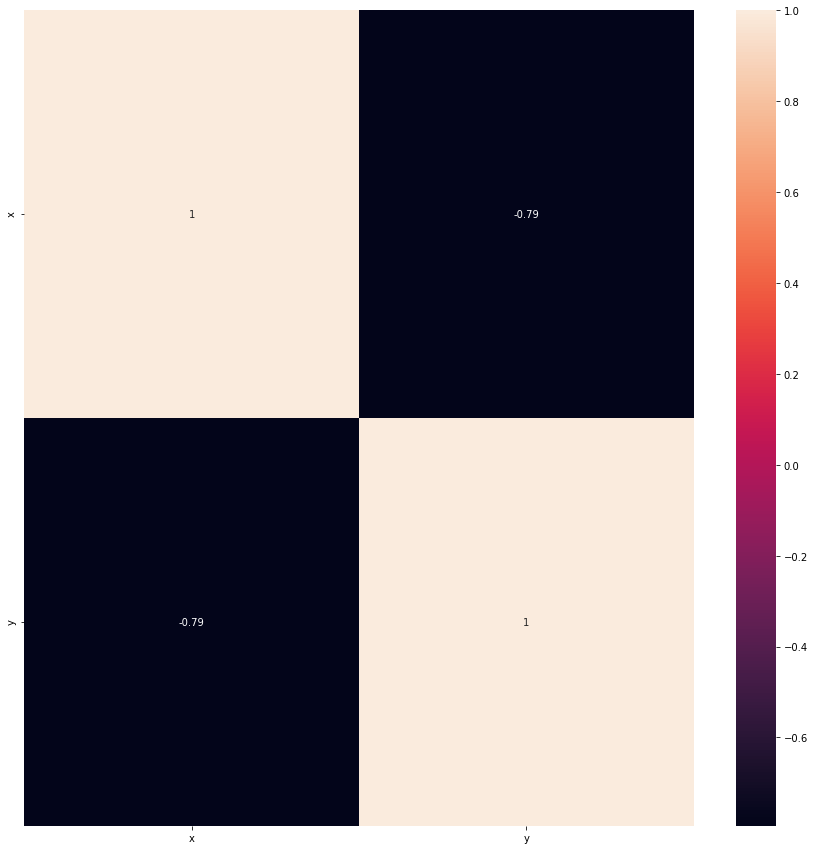

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cor=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
tstrain,tstest=train_test_split(data['x'],test_size=0.3,random_state=42)
ss=StratifiedShuffleSplit(test_size=0.3)
ss.get_n_splits(data)

10

In [7]:
data['y']

1     1.027483
2     1.245302
3     1.004781
4     1.264121
5     0.498330
6     0.597502
7     0.629410
8     0.822705
9     0.557581
10    0.565053
11   -0.393222
12   -0.912892
13   -1.128250
14   -1.110455
15   -0.570343
16   -0.620209
17   -0.873236
18   -0.187472
19   -0.025815
Name: y, dtype: float64

## R & D
* Do a classification prob and find out discrete output. - done

* what is multi class classification? multi class model? - done
* what is `ovr`? - done
* what is logisitic regression with regularization?penalty?cv i.e cross validation?
* what is threshold variance? why we use this?
* what is p-value?why is it minimized?
* what is random_state?
* diff types of correlation predictors?

In [366]:
newdataset=pd.DataFrame({'shape':['round','oval','round','round'],
                         'size':['small','large','small','small'],
                         'color':['red','green','red','yellow'],
                         'fruit_name':['apple','watermelon','apple','lemon'],
                         'price':[15,50,15,10]
                                  })

In [367]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le=le.fit(newdataset['fruit_name'])
Y_data=le.transform(newdataset['fruit_name'])
# Y_data=pd.Series(Y_data,name='fruit_name')


In [368]:
newdataset=newdataset.drop(columns=['fruit_name'])
pricecol=newdataset['price']
newdataset=newdataset.select_dtypes(include=[object])

pricecol=pricecol.to_numpy()

In [369]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = "auto", handle_unknown = "ignore")
Xenc=encoder.fit_transform(newdataset)

pcol=pricecol.reshape(-1,1)
X_data=np.append(Xenc.toarray(),pcol,axis=1)
X_data

array([[ 0.,  1.,  0.,  1.,  0.,  1.,  0., 15.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  0., 50.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0., 15.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  1., 10.]])

In [370]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_data, Y_data)
modelprect=clf.predict(X_data)


In [375]:
from sklearn.metrics import accuracy_score
unseendata=pd.DataFrame({'shape':['round','round'],'size':['large','small'],'color':['pink','red'],'price':[10,20]})
pecol=unseendata['price']
pecol=pecol.to_numpy()
pecol=pecol.reshape(-1,1)
unseendata=unseendata.drop(columns=['price'])
new_data=encoder.transform(unseendata).toarray()
new_data=np.append(new_data,pecol,axis=1)
newdata_predict=clf.predict(new_data)
le.inverse_transform(newdata_predict)
Y_data,newdata_predict
#accuracy_score(Y_data,modelprect)


(array([0, 2, 0, 1]), array([1, 0]))

# how to calculate accuracy if the new data is 1 tuple and what will be y true paramter

## Apple Class

In [376]:
# predict for every class i.e for apple,watermelon,lemon
# newdataset['fruit_name']=(newdataset['fruit_name']=='apple').astype(np.int)
# how to separate tuples with fruit name apple
extradata=pd.DataFrame({'shape':['round'],'size':['large'],'color':['red'],'fruit_name':['promogranate']})



shape    False
size     False
color    False
dtype: bool

In [ ]:
%%timeit
n=int(input())
a=[int(i) for i in input().split()][:n]
l=[]
for i in range(0,len(a)):
    
    p=list(a)
    p.remove(a[i])
    l.append(sum(p))

    
print(' '.join([str(min(l)),str(max(l))]))


In [ ]:
import timeit